In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Dataset

First we have training dataset in which data of 891 people. Out data set have 12 columns representing features.


In [8]:
train = pd.read_csv("train.csv")
train.shape

(891, 12)

### This is our dataset which have following features:

    PassengerId: Id of every passenger.
    Survived: This feature have value 0 and 1. 0 for not survived and 1 for survived.
    Pclass: There are 3 classes of passengers. Class1, Class2 and Class3.
    Name: Name of passenger.
    Sex: Gender of passenger.
    Age: Age of passenger.
    SibSp: Indication that passenger have siblings and spouse.
    Parch: Whether a passenger is alone or have family.
    Ticket: Ticket no of passenger.
    Fare: Indicating the fare.
    Cabin: The cabin of passenger.
    Embarked: The embarked category.
   

In [9]:
train.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Exploratory Data Analysis

Let's begin some exploratory data analysis! We'll start by checking out missing data!

In [10]:
train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


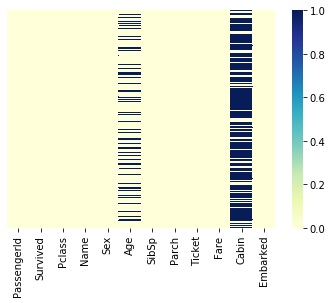

In [18]:
sns.heatmap(train.isnull(),yticklabels=False,cbar = True,cmap="YlGnBu")

In [21]:
train.isnull().sum() 

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Roughly 20 percent of the Age data is missing. The proportion of Age missing is likely small enough for reasonable replacement. The Cabin column has too many of null values which makes it not at all usefull. These coloumns needs to be filled up with appropriate values later on.

## Features: The titanic dataset has roughly the following types of features:

  *  Categorical/Nominal: Variables that can be divided into multiple categories but having no order or priority.
    Eg. Embarked (C = Cherbourg; Q = Queenstown; S = Southampton)
  * Binary: A subtype of categorical features, where the variable has only two categories.
    Eg: Sex (Male/Female)
  *  Ordinal: They are similar to categorical features but they have an order(i.e can be sorted).
    Eg. Pclass (1, 2, 3)
  * Continuous: They can take up any value between the minimum and maximum values in a column.
    Eg. Age, Fare
  * Count: They represent the count of a variable.
    Eg. SibSp, Parch
    
  * Useless: They don’t contribute to the final outcome of an ML model. Here, PassengerId, Name, Cabin and Ticket might fall into this category.

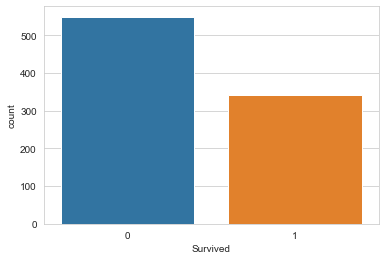

In [34]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=train)

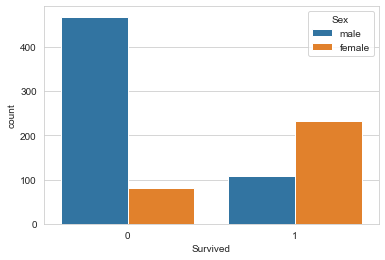

In [35]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=train)

## Observation :

We can observe from the graph that the survival rate of men is around 20% and that of women is around 75%. Therefore,a passenger's gender plays an important role in determining if one is going to survive or not.

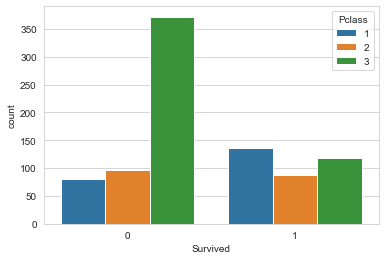

In [48]:

sns.countplot(x='Survived',hue='Pclass',data=train)

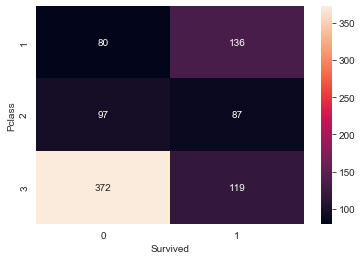

In [50]:
combine  = train.groupby(['Pclass','Survived'])
pclass_survived = combine.size().unstack() 

sns.heatmap(pclass_survived, annot = True, fmt ="d") 

## Observation :

It helps in determining if higher-class passengers had more survival rate than the lower class ones or vice versa. Class 1 passengers have a higher survival chance compared to classes 2 and 3. It implies that Pclass contributes a lot to a passenger’s survival rate.